# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [238]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [239]:
#create empty lists for api calls in loop
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record_count = 0
set_number = 0

#build query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
print("Beginning Data Retrieval")
print("----------------------------")


for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    response = requests.get(query_url).json()
        
    if record_count < 50:
        record_count +=1
    elif set_number < 5:
        set_number +=1
        record_count = 0
    else:
        break
        
    print("Processing Record {} of Set {} | {}".format(record_count, set_number, city))
    
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_name.append(city)
    except:
        print("City not found. Skipping...")
        
        time.sleep(1)

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")


Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 0 | malmesbury
Processing Record 2 of Set 0 | cherskiy
Processing Record 3 of Set 0 | atuona
Processing Record 4 of Set 0 | taga
Processing Record 5 of Set 0 | hobart
Processing Record 0 of Set 1 | saskylakh
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | arlit
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | busselton
Processing Record 0 of Set 2 | whitehorse
Processing Record 1 of Set 2 | albany
Processing Record 2 of Set 2 | price
Processing Record 3 of Set 2 | kahului
Processing Record 4 of Set 2 | port lincoln
Processing Record 5 of Set 2 | saint-remi
Processing Record 0 of Set 3 | tiksi
Processing Record 1 of Set 3 | altay
Processing Record 2 of Set 3 | komsomolskiy
Processing Record 3 of Set 3 | manado
Processing Record 4 of Set 3 | halalo
City not found. Skipping...
Processing Record 5 of Set 3 | punta arenas
Processing R

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [240]:
#convert to dataframe and display
weather_list = {"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, 
"Wind Speed": wind_speed, "Country": country, "Date": date}
weather_summary = pd.DataFrame(weather_list)
weather_summary

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malmesbury,-33.46,18.73,64.40,93,75,5.82,ZA,1607463214
1,cherskiy,68.75,161.30,-12.86,89,100,7.00,RU,1607463214
2,atuona,-9.80,-139.03,78.60,73,1,12.15,PF,1607463214
3,taga,46.95,24.05,34.00,86,20,6.93,RO,1607463214
4,hobart,-42.88,147.33,62.60,48,75,13.87,AU,1607463113
5,saskylakh,71.92,114.08,-16.02,87,97,3.53,RU,1607463214
6,qaanaaq,77.48,-69.36,-1.64,80,52,3.24,GL,1607463214
7,arlit,18.74,7.39,78.44,19,0,8.23,NE,1607463215
8,kapaa,22.08,-159.32,82.40,69,20,13.87,US,1607463215
9,bluff,-46.60,168.33,60.01,73,96,10.00,NZ,1607463215


In [241]:
#save to csv file
weather_summary.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [15]:
#output example

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [242]:
weather_summary.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01
mean,18.711250,13.071563,46.831562,70.593750,45.562500,8.305938,1.607463e+09
std,41.076614,109.409666,32.852550,22.443994,37.763216,5.207890,2.955694e+01
min,-53.150000,-159.320000,-19.950000,14.000000,0.000000,0.160000,1.607463e+09
25%,-17.575000,-74.435000,27.592500,64.750000,8.500000,4.572500,1.607463e+09
50%,25.720000,21.390000,56.005000,78.000000,40.500000,8.140000,1.607463e+09
75%,47.180000,117.710000,78.102500,86.250000,78.750000,10.837500,1.607463e+09
max,77.480000,172.790000,86.000000,94.000000,100.000000,23.150000,1.607463e+09


In [16]:
#output example

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [262]:
humidity_level = weather_summary.loc[weather_summary["Humidity"] > 100]
humidity_level

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
#output example

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [263]:
#  Get the indices of cities that have humidity over 100%.
weather_summary.index[weather_summary["Humidity"] > 100].tolist()

[]

Int64Index([], dtype='int64')

In [250]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# clean_city_data = weather_summary.drop(humidity_level, inplace=False)
# clean_city_data

In [19]:
#output example

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

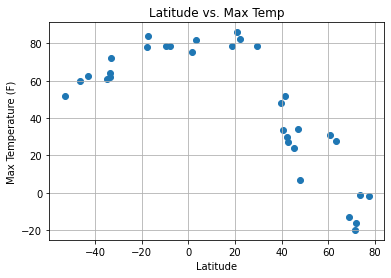

In [264]:
plt.scatter(weather_summary["Lat"], weather_summary["Max Temp"])
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# plt.savefig("LatvsTemp.png")
plt.grid()
plt.show()

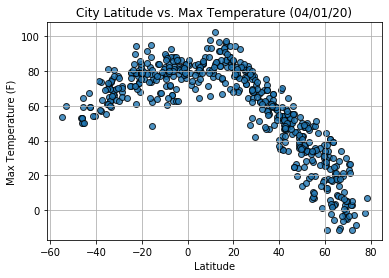

In [10]:
#output example

## Latitude vs. Humidity Plot

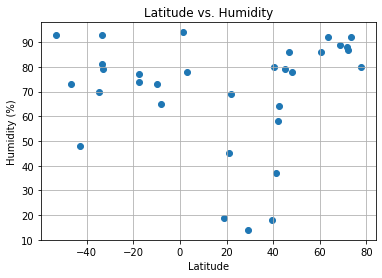

In [258]:
plt.scatter(weather_summary["Lat"], weather_summary["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.savefig("LatvsHumidity.png")
plt.grid()
plt.show()

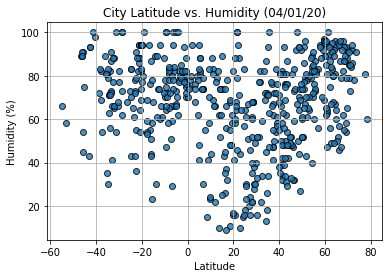

In [11]:
#output example

## Latitude vs. Cloudiness Plot

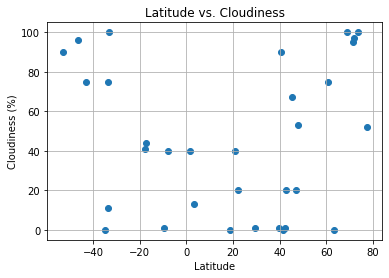

In [259]:
plt.scatter(weather_summary["Lat"], weather_summary["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# plt.savefig("LatvsClouds.png")
plt.grid()
plt.show()

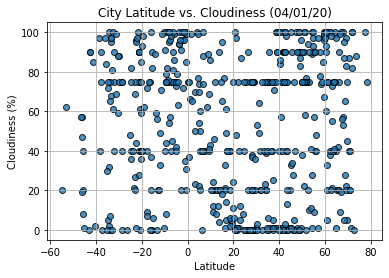

In [12]:
#output example

## Latitude vs. Wind Speed Plot

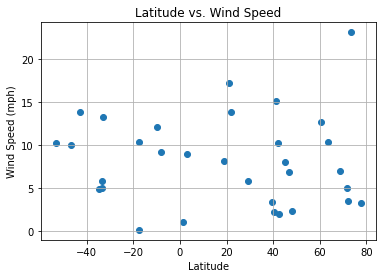

In [260]:
plt.scatter(weather_summary["Lat"], weather_summary["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.savefig("LatvsWind.png")
plt.grid()
plt.show()

In [256]:
#output example

## Linear Regression

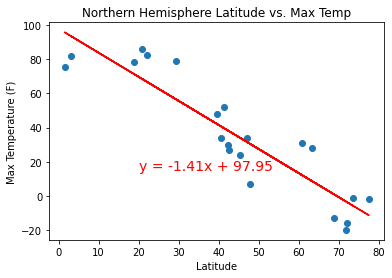

The r-squared is: 0.8284119735961277


In [257]:
#Northern Hemisphere - Temperature (F) vs. Latitude 

northern_data = weather_summary.loc[weather_summary["Lat"] >= 0]
x_values = northern_data["Lat"]
y_values = northern_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_equation,(20,15), fontsize=14, color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


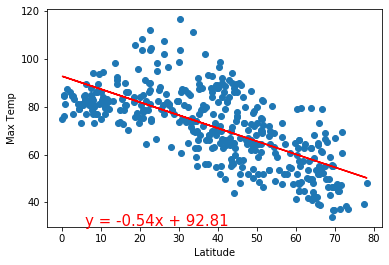

In [25]:
#output example

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

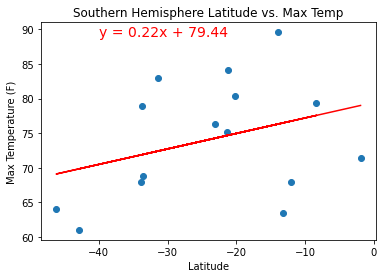

The r-squared is: 0.1142108778637203


In [225]:
#Southern Hemisphere - Temperature (F) vs. Latitude

southern_data = weather_summary.loc[weather_summary["Lat"] < 0]
x_values = southern_data["Lat"] 
y_values = southern_data["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_equation,(-40,89),fontsize=14, color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.6082708688906918


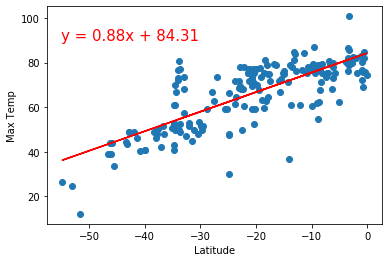

In [26]:
#output example

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

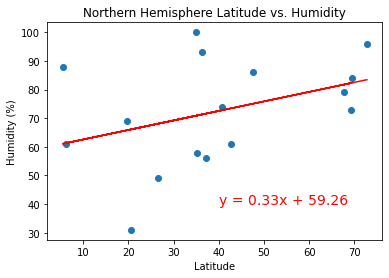

The r-squared is: 0.14410479216186


In [227]:
#Northern Hemisphere - Humidity (%) vs. Latitude

x_values = northern_data["Lat"]
y_values = northern_data["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_equation,(40,40), fontsize=14, color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.000543987878808455


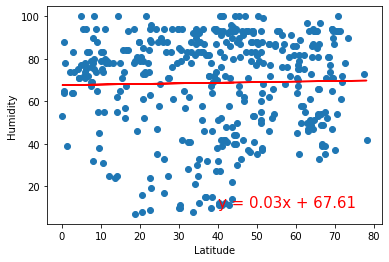

In [27]:
#output example

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

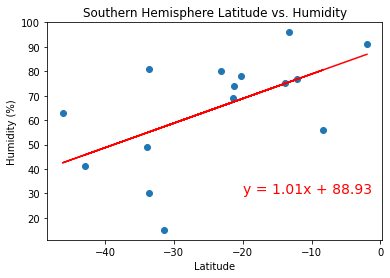

The r-squared is: 0.32086835767581845


In [228]:
#Southern Hemisphere - Humidity (%) vs. Latitude

x_values = southern_data["Lat"]
y_values = southern_data["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_equation,(-20,30), fontsize=14, color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.014985174297345524


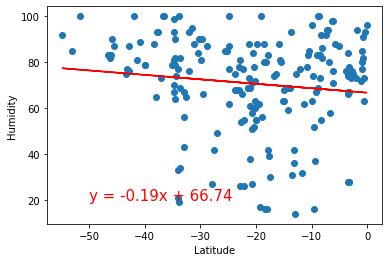

In [28]:
#output example

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

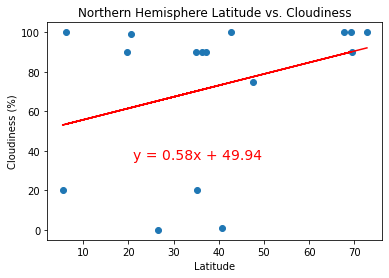

The r-squared is: 0.10721716607579733


In [229]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = northern_data["Lat"]
y_values = northern_data["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_equation,(21,36), fontsize=14, color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.0020898727664228514


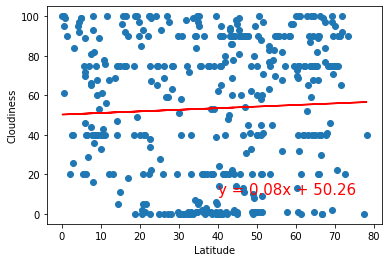

In [29]:
#output example

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

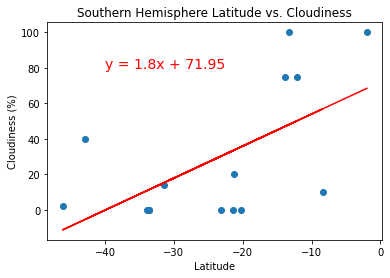

The r-squared is: 0.35898543361542634


In [235]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = southern_data["Lat"]
y_values = southern_data["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_equation,(-40,80), fontsize=14, color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.0035263772085582894


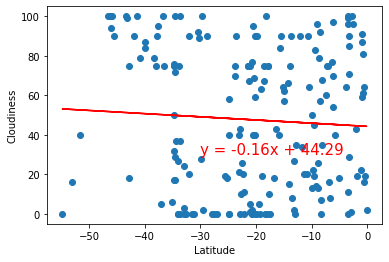

In [30]:
#output example

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

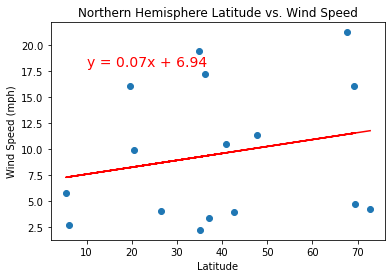

The r-squared is: 0.047873963954617765


In [233]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

# x_values = northern_data["Lat"]
# y_values = northern_data["Wind Speed"]

# slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# regression = x_values * slope + intercept
# line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values, y_values)
# plt.plot(x_values, regression, "r-")
# plt.title("Northern Hemisphere Latitude vs. Wind Speed")
# plt.xlabel("Latitude")
# plt.ylabel("Wind Speed (mph)")
# plt.annotate(line_equation,(10,18), fontsize=14, color="red")
# plt.show()

# print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.04019723576144484


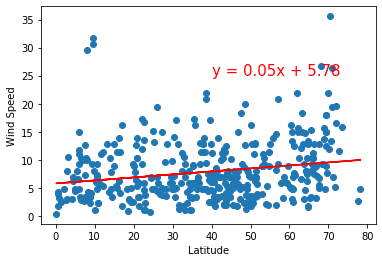

In [31]:
#output example

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

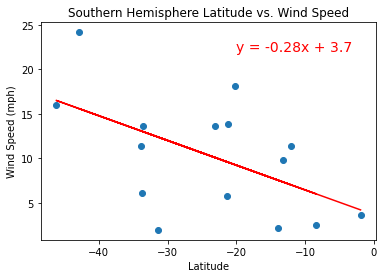

The r-squared is: 0.29678588092594066


In [234]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = southern_data["Lat"]
y_values = southern_data["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_equation,(-20,22), fontsize=14, color="red")
plt.show()

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.017128274759839232


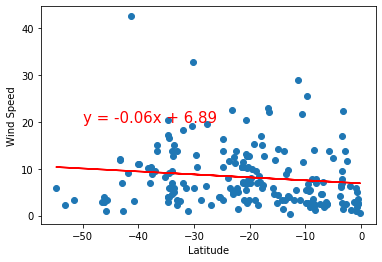

In [32]:
#output example